In [1]:
import matplotlib.pyplot as plt
import polars as pl
from obspy import read

In [2]:
cat = pl.read_csv(
    "space_apps_2024_seismic_detection/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv"
)
cat

filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
str,str,f64,str,str
"""xa.s12.00.mhz.1970-01-19HR00_e…","""1970-01-19T20:25:00.000000""",73500.0,"""evid00002""","""impact_mq"""
"""xa.s12.00.mhz.1970-03-25HR00_e…","""1970-03-25T03:32:00.000000""",12720.0,"""evid00003""","""impact_mq"""
"""xa.s12.00.mhz.1970-03-26HR00_e…","""1970-03-26T20:17:00.000000""",73020.0,"""evid00004""","""impact_mq"""
"""xa.s12.00.mhz.1970-04-25HR00_e…","""1970-04-25T01:14:00.000000""",4440.0,"""evid00006""","""impact_mq"""
"""xa.s12.00.mhz.1970-04-26HR00_e…","""1970-04-26T14:29:00.000000""",52140.0,"""evid00007""","""deep_mq"""
…,…,…,…,…
"""xa.s12.00.mhz.1974-10-14HR00_e…","""1974-10-14T17:43:00.000000""",63780.0,"""evid00156""","""impact_mq"""
"""xa.s12.00.mhz.1975-04-12HR00_e…","""1975-04-12T18:15:00.000000""",65700.0,"""evid00191""","""impact_mq"""
"""xa.s12.00.mhz.1975-05-04HR00_e…","""1975-05-04T10:05:00.000000""",36300.0,"""evid00192""","""impact_mq"""


In [3]:
cat.describe()

statistic,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
str,str,str,f64,str,str
"""count""","""76""","""76""",76.0,"""76""","""76"""
"""null_count""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",null,null,41878.421053,null,null
"""std""",null,null,25254.710085,null,null
"""min""","""xa.s12.00.mhz.1970-01-19HR00_e…","""1970-01-19T20:25:00.000000""",1380.0,"""evid00002""","""deep_mq"""
"""25%""",null,null,19800.0,null,null
"""50%""",null,null,43500.0,null,null
"""75%""",null,null,65280.0,null,null
"""max""","""xa.s12.00.mhz.1975-06-26HR00_e…","""1975-06-26T03:24:00.000000""",84660.0,"""evid00198""","""shallow_mq"""


In [4]:
cat.columns

['filename',
 'time_abs(%Y-%m-%dT%H:%M:%S.%f)',
 'time_rel(sec)',
 'evid',
 'mq_type']

In [5]:
cat_directory = "space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/"
cat_file = cat_directory + "xa.s12.00.mhz.1970-01-19HR00_evid00002.csv"
cat = pl.read_csv(cat_file)
cat

time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
str,f64,f64
"""1970-01-19T00:00:00.665000""",0.0,-6.1533e-14
"""1970-01-19T00:00:00.815943""",0.150943,-7.7013e-14
"""1970-01-19T00:00:00.966887""",0.301887,-8.3962e-14
"""1970-01-19T00:00:01.117830""",0.45283,-8.0962e-14
"""1970-01-19T00:00:01.268774""",0.603774,-7.0976e-14
…,…,…
"""1970-01-20T00:00:02.174434""",86401.509434,-1.4727e-14
"""1970-01-20T00:00:02.325377""",86401.660377,-1.9561e-14
"""1970-01-20T00:00:02.476321""",86401.811321,-2.2403e-14


In [6]:
cat.describe()

statistic,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
str,str,f64,f64
"""count""","""572415""",572415.0,572415.0
"""null_count""","""0""",0.0,0.0
"""mean""",null,43201.056604,-8.4431e-13
"""std""",null,24942.20702,3.5301e-10
"""min""","""1970-01-19T00:00:00.665000""",0.0,-8.1853e-9
"""25%""",null,21600.603774,-5.5047e-11
"""50%""",null,43201.056604,-1.6338e-17
"""75%""",null,64801.660377,5.4436e-11
"""max""","""1970-01-20T00:00:02.778208""",86402.113208,7.8740e-9


In [7]:
cat.columns

['time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'time_rel(sec)', 'velocity(m/s)']

In [8]:
# get row 489650
print(cat.row(index=489650))

('1970-01-19T20:31:50.098962', 73909.43396226416, 7.874025895059157e-09)


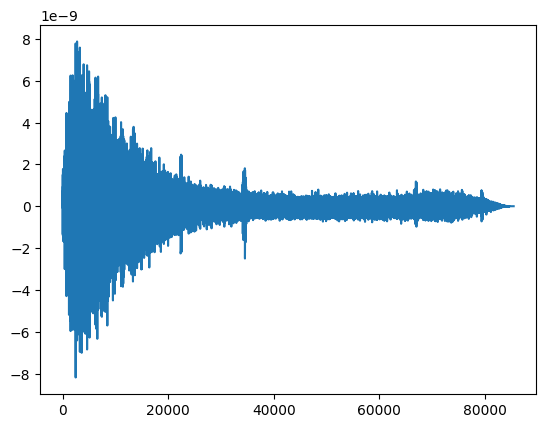

In [17]:
tr: pl.Series = cat.filter(pl.col("time_rel(sec)") >= 73500)["velocity(m/s)"]
plt.plot(tr)
plt.show()

In [10]:
st = read(
    "space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed"
)

In [11]:
st

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-01-19T00:00:00.665000Z - 1970-01-20T00:00:02.778208Z | 6.6 Hz, 572415 samples

In [12]:
st[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-01-19T00:00:00.665000Z
         endtime: 1970-01-20T00:00:02.778208Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572415
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

In [13]:
st[0].data

array([-6.15327896e-14, -7.70128843e-14, -8.39618673e-14, ...,
       -2.24030684e-14, -2.99840543e-14, -4.46551537e-14])

In [14]:
st[0]

XA.S12.00.MHZ | 1970-01-19T00:00:00.665000Z - 1970-01-20T00:00:02.778208Z | 6.6 Hz, 572415 samples

In [15]:
for k, v in sorted(st[0].stats.mseed.items()):  # type: ignore
    print("'%s': %s" % (k, str(v)))

'byteorder': >
'dataquality': D
'encoding': FLOAT64
'filesize': 4653056
'number_of_records': 1136
'record_length': 4096


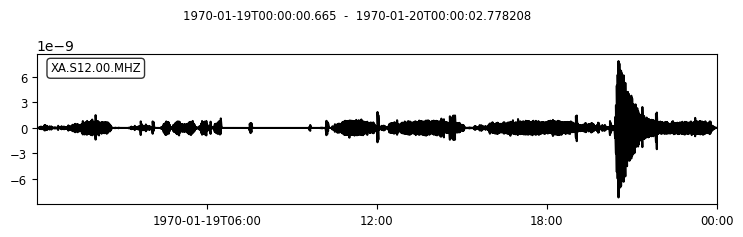

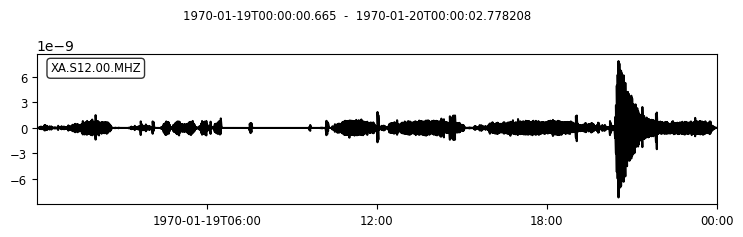

In [16]:
st.plot(
)